In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns
from random import randrange
from scipy.stats import linregress
import numpy as np
import calendar
# Study data files
path = "../Resources/backloggd_games.csv"

# Read the mouse data and the study results
game_df = pd.read_csv(path)
del game_df["Unnamed: 0"]
# Display the data table for preview
game_df.head()

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,Elden Ring,25-Feb-22,"['FromSoftware', 'Bandai Namco Entertainment']","Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,The Legend of Zelda: Breath of the Wild,3-Mar-17,"['Nintendo', 'Nintendo EPD Production Group No...",The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,Hades,7-Dec-18,['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,Hollow Knight,24-Feb-17,['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,Undertale,15-Sep-15,"['tobyfox', '8-4']","A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


In [2]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         60000 non-null  object 
 1   Release_Date  60000 non-null  object 
 2   Developers    60000 non-null  object 
 3   Summary       55046 non-null  object 
 4   Platforms     60000 non-null  object 
 5   Genres        60000 non-null  object 
 6   Rating        25405 non-null  float64
 7   Plays         60000 non-null  object 
 8   Playing       60000 non-null  object 
 9   Backlogs      60000 non-null  object 
 10  Wishlist      60000 non-null  object 
 11  Lists         60000 non-null  object 
 12  Reviews       60000 non-null  object 
dtypes: float64(1), object(12)
memory usage: 6.0+ MB


In [3]:
game_df.Developers.nunique()

18356

In [4]:
game_df.Developers.value_counts()

Developers
[]                                        18091
['Konami']                                  470
['Nintendo']                                325
['Capcom']                                  318
['Sega']                                    185
                                          ...  
['NanoPiko Games', 'Plug In Digital']         1
['DevCubeStudio', 'Fibrum Limited']           1
['TeamFatBears']                              1
['Blueside', 'Microsoft Game Studios']        1
['Travian Games', 'Shadow Masters']           1
Name: count, Length: 18356, dtype: int64

In [5]:
game_df.Title.value_counts()

Title
Date A Live Twin Edition: Rio Reincarnation            24
Tube                                                   21
Yakiniku Bugyou                                        20
The Store is Closed                                    20
Nonogram Survival                                      19
                                                       ..
Spider-Man: Homecoming - Virtual Reality Experience     1
Hammerfight                                             1
Team USA Basketball                                     1
Syvalion                                                1
Orbit - Playing with Gravity                            1
Name: count, Length: 40985, dtype: int64

In [6]:
game_df.Title.nunique()

40985

In [7]:
game_df['Developers']=game_df['Developers'].str.split(',').str[0]
game_df.head()

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,Elden Ring,25-Feb-22,['FromSoftware',"Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,The Legend of Zelda: Breath of the Wild,3-Mar-17,['Nintendo',The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,Hades,7-Dec-18,['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,Hollow Knight,24-Feb-17,['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,Undertale,15-Sep-15,['tobyfox',"A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


In [8]:
game_df["Developers"] = game_df["Developers"].astype(str)
game_df.head()

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,Elden Ring,25-Feb-22,['FromSoftware',"Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,The Legend of Zelda: Breath of the Wild,3-Mar-17,['Nintendo',The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,Hades,7-Dec-18,['Supergiant Games'],A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,Hollow Knight,24-Feb-17,['Team Cherry'],A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,Undertale,15-Sep-15,['tobyfox',"A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


In [9]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         60000 non-null  object 
 1   Release_Date  60000 non-null  object 
 2   Developers    60000 non-null  object 
 3   Summary       55046 non-null  object 
 4   Platforms     60000 non-null  object 
 5   Genres        60000 non-null  object 
 6   Rating        25405 non-null  float64
 7   Plays         60000 non-null  object 
 8   Playing       60000 non-null  object 
 9   Backlogs      60000 non-null  object 
 10  Wishlist      60000 non-null  object 
 11  Lists         60000 non-null  object 
 12  Reviews       60000 non-null  object 
dtypes: float64(1), object(12)
memory usage: 6.0+ MB


In [10]:
game_df["Developers"] = game_df["Developers"].apply(lambda x: str(x).lstrip("['")) #TA Mike came up with this code
game_df["Developers"] = game_df["Developers"].apply(lambda x: str(x).rstrip("']"))
game_df.head()

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,Elden Ring,25-Feb-22,FromSoftware,"Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21K,4.1K,5.6K,5.5K,4.6K,3K
1,The Legend of Zelda: Breath of the Wild,3-Mar-17,Nintendo,The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35K,3.1K,5.6K,3K,5.1K,3K
2,Hades,7-Dec-18,Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25K,3.5K,7.3K,4K,3.2K,2.1K
3,Hollow Knight,24-Feb-17,Team Cherry,A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25K,2.7K,9.6K,2.6K,3.4K,2.1K
4,Undertale,15-Sep-15,tobyfox,"A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32K,728,5.7K,2.1K,3.9K,2.5K


In [11]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Title         60000 non-null  object 
 1   Release_Date  60000 non-null  object 
 2   Developers    60000 non-null  object 
 3   Summary       55046 non-null  object 
 4   Platforms     60000 non-null  object 
 5   Genres        60000 non-null  object 
 6   Rating        25405 non-null  float64
 7   Plays         60000 non-null  object 
 8   Playing       60000 non-null  object 
 9   Backlogs      60000 non-null  object 
 10  Wishlist      60000 non-null  object 
 11  Lists         60000 non-null  object 
 12  Reviews       60000 non-null  object 
dtypes: float64(1), object(12)
memory usage: 6.0+ MB


In [12]:
# Use a for loop to change to columns (Plays, Playing, Backlogs, Wishlist, Lists, and Reviews)
# Use an replace statement to any change any value with 'K' to a float, multiply that by 1,000, and then change the entire column to integers

cols = ('Plays', 'Playing', 'Backlogs', 'Wishlist', 'Lists', 'Reviews')

for col in cols:
    # Apply a lambda function to replace ‘K’ and multiply by 1000 if ‘K’ is present
    game_df[col] = game_df[col].apply(lambda x: float(str(x).replace('K', '')) * 1000 if 'K' in str(x) else int(x))

game_df.head()

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews
0,Elden Ring,25-Feb-22,FromSoftware,"Elden Ring is a fantasy, action and open world...","['Windows PC', 'PlayStation 4', 'Xbox One', 'P...","['Adventure', 'RPG']",4.5,21000.0,4100.0,5600.0,5500.0,4600.0,3000.0
1,The Legend of Zelda: Breath of the Wild,3-Mar-17,Nintendo,The Legend of Zelda: Breath of the Wild is the...,"['Wii U', 'Nintendo Switch']","['Adventure', 'Puzzle']",4.4,35000.0,3100.0,5600.0,3000.0,5100.0,3000.0
2,Hades,7-Dec-18,Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"['Windows PC', 'Mac', 'PlayStation 4', 'Xbox O...","['Adventure', 'Brawler', 'Indie', 'RPG']",4.3,25000.0,3500.0,7300.0,4000.0,3200.0,2100.0
3,Hollow Knight,24-Feb-17,Team Cherry,A 2D metroidvania with an emphasis on close co...,"['Windows PC', 'Mac', 'Linux', 'Nintendo Switch']","['Adventure', 'Indie', 'Platform']",4.4,25000.0,2700.0,9600.0,2600.0,3400.0,2100.0
4,Undertale,15-Sep-15,tobyfox,"A small child falls into the Underground, wher...","['Windows PC', 'Mac', 'Linux', 'PlayStation 4'...","['Adventure', 'Indie', 'RPG', 'Turn Based Stra...",4.2,32000.0,728.0,5700.0,2100.0,3900.0,2500.0


In [13]:
# Change Release_Date to datetime, had to adjust for TBD values so changed them to NaT (Not a Time) function

game_df['Release_Date'] = game_df['Release_Date'].str.replace('TBD', 'NaT')
game_df['Release_Date'] = pd.to_datetime(game_df['Release_Date'])

C:\Users\mrunm\AppData\Local\Temp\ipykernel_24392\275331274.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  game_df['Release_Date'] = pd.to_datetime(game_df['Release_Date'])


In [14]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Title         60000 non-null  object        
 1   Release_Date  51981 non-null  datetime64[ns]
 2   Developers    60000 non-null  object        
 3   Summary       55046 non-null  object        
 4   Platforms     60000 non-null  object        
 5   Genres        60000 non-null  object        
 6   Rating        25405 non-null  float64       
 7   Plays         60000 non-null  float64       
 8   Playing       60000 non-null  float64       
 9   Backlogs      60000 non-null  float64       
 10  Wishlist      60000 non-null  float64       
 11  Lists         60000 non-null  float64       
 12  Reviews       60000 non-null  float64       
dtypes: datetime64[ns](1), float64(7), object(5)
memory usage: 6.0+ MB


In [15]:
game_df['Platforms'] = game_df['Platforms'].str.split(',')
game_df['Genres'] = game_df['Genres'].str.split(',')

In [148]:
game_df['Platforms']

0        Windows PC,  PlayStation 4,  Xbox One,  PlaySt...
1                                  Wii U,  Nintendo Switch
2        Windows PC,  Mac,  PlayStation 4,  Xbox One,  ...
3               Windows PC,  Mac,  Linux,  Nintendo Switch
4        Windows PC,  Mac,  Linux,  PlayStation 4,  Xbo...
                               ...                        
59995                                           Windows PC
59996                             PlayStation 4,  Xbox One
59997                                           Windows PC
59998                                           Windows PC
59999                             PlayStation 4,  Xbox One
Name: Platforms, Length: 60000, dtype: object

In [146]:
# After converting those columns into a list, I could now continue with creating a code that can count the Platforms and Genres, then put them in new columns.
# I thought that maybe len(x) could work, it failed, then tried .apply len(x), which also failed.
# There was no specific function to accomplish what I needed, which reminded me of lambda, which I had previously looked up because the TA had given the group a lambda function before.
# After repeated trial and error I finally came up with the code below.
# ".apply" applies all the things in the () to the Platforms column. 
# "lambda x:" is used because "lambda", x, and colon, must be used in that order to start the lambda function.
# "len(x)" is used to count the x or elements within the cell.
platform_counts = game_df['Platforms'].apply(lambda x: len(x))
genre_counts = game_df['Genres'].apply(lambda x: len(x))

# Adding new columns for platform and genre counts through the use of brackets..
game_df['Platform_Count'] = platform_counts
game_df['Genre_Count'] = genre_counts


game_df.head()

0        Windows PC,  PlayStation 4,  Xbox One,  PlaySt...
1                                  Wii U,  Nintendo Switch
2        Windows PC,  Mac,  PlayStation 4,  Xbox One,  ...
3               Windows PC,  Mac,  Linux,  Nintendo Switch
4        Windows PC,  Mac,  Linux,  PlayStation 4,  Xbo...
                               ...                        
59995                                           Windows PC
59996                             PlayStation 4,  Xbox One
59997                                           Windows PC
59998                                           Windows PC
59999                             PlayStation 4,  Xbox One
Name: Platforms, Length: 60000, dtype: object


In [147]:
# Now that the list was done, I need to convert back to a string so I could use str.replace (as was originally planned but would change) to get rid of the extra characters.
# I copied the code used for turning the developers column into a string and then altered it for Platforms and Genres.
game_df['Platforms'] = game_df['Platforms'].astype(str)
game_df['Genres'] = game_df['Genres'].astype(str)
game_df.head()

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count,Release_Year,Release_Month
0,Elden Ring,2022-02-25,FromSoftware,"Elden Ring is a fantasy, action and open world...","Windows PC, PlayStation 4, Xbox One, PlaySt...","Adventure, RPG",4.5,21000.0,4100.0,5600.0,5500.0,4600.0,3000.0,67,15,2022.0,2.0
1,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,The Legend of Zelda: Breath of the Wild is the...,"Wii U, Nintendo Switch","Adventure, Puzzle",4.4,35000.0,3100.0,5600.0,3000.0,5100.0,3000.0,23,18,2017.0,3.0
2,Hades,2018-12-07,Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"Windows PC, Mac, PlayStation 4, Xbox One, ...","Adventure, Brawler, Indie, RPG",4.3,25000.0,3500.0,7300.0,4000.0,3200.0,2100.0,91,33,2018.0,12.0
3,Hollow Knight,2017-02-24,Team Cherry,A 2D metroidvania with an emphasis on close co...,"Windows PC, Mac, Linux, Nintendo Switch","Adventure, Indie, Platform",4.4,25000.0,2700.0,9600.0,2600.0,3400.0,2100.0,42,28,2017.0,2.0
4,Undertale,2015-09-15,tobyfox,"A small child falls into the Underground, wher...","Windows PC, Mac, Linux, PlayStation 4, Xbo...","Adventure, Indie, RPG, Turn Based Strategy",4.2,32000.0,728.0,5700.0,2100.0,3900.0,2500.0,88,45,2015.0,9.0


In [18]:
# Originally was 8 lines of code to remove the unwanted characters but after playing around a bit, I got it lowered to two.
game_df['Platforms'] = game_df['Platforms'].str.replace("[","").str.replace("]","").str.replace("'","").str.replace('"','')
game_df['Genres'] = game_df['Genres'].str.replace("[","").str.replace("]","").str.replace("'","").str.replace('"','')
game_df.head()

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count
0,Elden Ring,2022-02-25,FromSoftware,"Elden Ring is a fantasy, action and open world...","Windows PC, PlayStation 4, Xbox One, PlaySt...","Adventure, RPG",4.5,21000.0,4100.0,5600.0,5500.0,4600.0,3000.0,5,2
1,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,The Legend of Zelda: Breath of the Wild is the...,"Wii U, Nintendo Switch","Adventure, Puzzle",4.4,35000.0,3100.0,5600.0,3000.0,5100.0,3000.0,2,2
2,Hades,2018-12-07,Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"Windows PC, Mac, PlayStation 4, Xbox One, ...","Adventure, Brawler, Indie, RPG",4.3,25000.0,3500.0,7300.0,4000.0,3200.0,2100.0,7,4
3,Hollow Knight,2017-02-24,Team Cherry,A 2D metroidvania with an emphasis on close co...,"Windows PC, Mac, Linux, Nintendo Switch","Adventure, Indie, Platform",4.4,25000.0,2700.0,9600.0,2600.0,3400.0,2100.0,4,3
4,Undertale,2015-09-15,tobyfox,"A small child falls into the Underground, wher...","Windows PC, Mac, Linux, PlayStation 4, Xbo...","Adventure, Indie, RPG, Turn Based Strategy",4.2,32000.0,728.0,5700.0,2100.0,3900.0,2500.0,7,4


In [19]:
game_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Title           60000 non-null  object        
 1   Release_Date    51981 non-null  datetime64[ns]
 2   Developers      60000 non-null  object        
 3   Summary         55046 non-null  object        
 4   Platforms       60000 non-null  object        
 5   Genres          60000 non-null  object        
 6   Rating          25405 non-null  float64       
 7   Plays           60000 non-null  float64       
 8   Playing         60000 non-null  float64       
 9   Backlogs        60000 non-null  float64       
 10  Wishlist        60000 non-null  float64       
 11  Lists           60000 non-null  float64       
 12  Reviews         60000 non-null  float64       
 13  Platform_Count  60000 non-null  int64         
 14  Genre_Count     60000 non-null  int64         
dtypes:

In [20]:
game_df.describe()

,Release_Date,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count
count,51981,25405.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,2011-05-02 10:11:08.598141696,3.033171,206.223883,6.298450,54.189067,27.994217,29.682567,11.819267,1.944250,1.919967
min,1974-03-01 00:00:00,0.300000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,1.000000,1.000000
25%,2004-09-16 00:00:00,2.600000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,2014-12-31 00:00:00,3.100000,3.000000,0.000000,2.000000,1.000000,2.000000,0.000000,1.000000,2.000000
75%,2019-09-06 00:00:00,3.500000,22.000000,0.000000,10.000000,6.000000,8.000000,2.000000,2.000000,3.000000
max,2073-12-31 00:00:00,5.000000,43000.000000,4600.000000,9600.000000,5500.000000,5100.000000,3000.000000,21.000000,20.000000
std,NaN,0.735573,1203.607226,61.118711,285.765003,153.350059,140.521330,72.419147,1.618987,1.102625


In [21]:
# Color Codes for seaborn palette
colors = ['#007F5F', '#2B9348', '#55A630', '#80B918', '#AACC00', '#BFD200', '#D4D700', '#DDDF00', '#EEEF20', '#FFFF3F']
# Set custom palette name in seaborn charts
customPalette = sns.set_palette(sns.color_palette(colors))
# Copy Code for seaborn charts
# palette=customPalette

In [22]:
game_df["Release_Year"]=game_df["Release_Date"].dt.year
game_df["Release_Month"]=game_df["Release_Date"].dt.month
game_df.head(20)

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count,Release_Year,Release_Month
0,Elden Ring,2022-02-25,FromSoftware,"Elden Ring is a fantasy, action and open world...","Windows PC, PlayStation 4, Xbox One, PlaySt...","Adventure, RPG",4.5,21000.0,4100.0,5600.0,5500.0,4600.0,3000.0,5,2,2022.0,2.0
1,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,The Legend of Zelda: Breath of the Wild is the...,"Wii U, Nintendo Switch","Adventure, Puzzle",4.4,35000.0,3100.0,5600.0,3000.0,5100.0,3000.0,2,2,2017.0,3.0
2,Hades,2018-12-07,Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"Windows PC, Mac, PlayStation 4, Xbox One, ...","Adventure, Brawler, Indie, RPG",4.3,25000.0,3500.0,7300.0,4000.0,3200.0,2100.0,7,4,2018.0,12.0
3,Hollow Knight,2017-02-24,Team Cherry,A 2D metroidvania with an emphasis on close co...,"Windows PC, Mac, Linux, Nintendo Switch","Adventure, Indie, Platform",4.4,25000.0,2700.0,9600.0,2600.0,3400.0,2100.0,4,3,2017.0,2.0
4,Undertale,2015-09-15,tobyfox,"A small child falls into the Underground, wher...","Windows PC, Mac, Linux, PlayStation 4, Xbo...","Adventure, Indie, RPG, Turn Based Strategy",4.2,32000.0,728.0,5700.0,2100.0,3900.0,2500.0,7,4,2015.0,9.0
5,Minecraft,2011-11-18,Mojang Studios,Minecraft focuses on allowing the player to ex...,"Windows PC, Mac, Linux","Adventure, Simulator",4.3,38000.0,2100.0,1300.0,265.0,2600.0,2700.0,3,2,2011.0,11.0
6,Omori,2020-12-25,OMOCAT,A turn-based surreal horror RPG in which a chi...,"Windows PC, Mac, PlayStation 4, Xbox One, ...","Adventure, Indie, RPG, Turn Based Strategy",4.1,8700.0,1200.0,5300.0,4300.0,1800.0,1400.0,6,4,2020.0,12.0
7,The Legend of Zelda: Tears of the Kingdom,2023-05-12,Nintendo,The Legend of Zelda: Tears of the Kingdom is t...,Nintendo Switch,Adventure,4.6,43000.0,4600.0,3000.0,5200.0,1900.0,1100.0,1,1,2023.0,5.0
8,Resident Evil 4,2023-03-24,Capcom,Resident Evil 4 is a remake of the 2005 origin...,"Windows PC, PlayStation 4, PlayStation 5, X...","Adventure, Puzzle, Shooter",4.6,6100.0,908.0,2100.0,3500.0,1900.0,1400.0,4,3,2023.0,3.0
9,NieR: Automata,2017-02-23,PlatinumGames,"NieR: Automata tells the story of androids 2B,...","Windows PC, PlayStation 4","Brawler, RPG",4.3,20000.0,1300.0,7200.0,4000.0,3200.0,1400.0,2,2,2017.0,2.0


In [23]:
reviews_df=game_df[game_df['Reviews'] >= 200].sort_values(by="Rating", ascending=False).reset_index(drop=True)
reviews_df.head(20)

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count,Release_Year,Release_Month
0,Resident Evil 4,2023-03-24,Capcom,Resident Evil 4 is a remake of the 2005 origin...,"Windows PC, PlayStation 4, PlayStation 5, X...","Adventure, Puzzle, Shooter",4.6,6100.0,908.0,2100.0,3500.0,1900.0,1400.0,4,3,2023.0,3.0
1,Bloodborne: The Old Hunters,2015-11-24,FromSoftware,The Old Hunters is the first Expansion for Blo...,PlayStation 4,"Adventure, RPG",4.6,5100.0,80.0,1100.0,721.0,310.0,252.0,1,2,2015.0,11.0
2,Final Fantasy XIV: Endwalker,2021-12-07,Square Enix,Final Fantasy XIV: Endwalker is the fourth exp...,"Windows PC, Mac, PlayStation 4, PlayStation 5","Adventure, RPG",4.6,2900.0,503.0,789.0,437.0,472.0,370.0,4,2,2021.0,12.0
3,Disco Elysium: The Final Cut,2021-03-30,ZA/UM,Disco Elysium: The Final Cut is a groundbreaki...,"Windows PC, Mac, PlayStation 4, Xbox One, ...","Adventure, Indie, RPG",4.6,7300.0,1300.0,6000.0,3100.0,1300.0,874.0,8,3,2021.0,3.0
4,Final Fantasy XIV: Shadowbringers,2019-07-02,Square Enix,SHADOWBRINGERS is the third expansion for FFXI...,"Windows PC, Mac, PlayStation 4, PlayStation 5",RPG,4.6,3400.0,198.0,570.0,300.0,446.0,302.0,4,1,2019.0,7.0
5,The Legend of Zelda: Tears of the Kingdom,2023-05-12,Nintendo,The Legend of Zelda: Tears of the Kingdom is t...,Nintendo Switch,Adventure,4.6,43000.0,4600.0,3000.0,5200.0,1900.0,1100.0,1,1,2023.0,5.0
6,Outer Wilds,2019-05-28,Mobius Digital,Outer Wilds is a critically-acclaimed and awar...,"Windows PC, PlayStation 4, Xbox One, PlaySt...","Adventure, Indie, Puzzle, Simulator",4.6,9100.0,736.0,5700.0,3600.0,2000.0,1100.0,6,4,2019.0,5.0
7,Metal Gear Solid 3: Subsistence,2005-12-22,Konami Computer Entertainment Japan,Metal Gear Solid 3: Subsistence continues the ...,PlayStation 2,"Adventure, Shooter, Tactical",4.6,4200.0,60.0,1200.0,749.0,754.0,206.0,1,3,2005.0,12.0
8,Disco Elysium,2019-10-15,ZA/UM,"A CRPG in which, waking up in a hotel room a t...","Windows PC, Mac","Adventure, RPG, Turn Based Strategy",4.6,4800.0,561.0,3300.0,2100.0,1300.0,364.0,2,3,2019.0,10.0
9,Mass Effect Legendary Edition,2021-05-14,BioWare,One person is all that stands between humanity...,"Windows PC, PlayStation 4, Xbox One","Adventure, RPG, Shooter, Strategy",4.5,3400.0,649.0,2900.0,1000.0,679.0,295.0,3,4,2021.0,5.0


In [24]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808 entries, 0 to 807
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Title           808 non-null    object        
 1   Release_Date    808 non-null    datetime64[ns]
 2   Developers      808 non-null    object        
 3   Summary         808 non-null    object        
 4   Platforms       808 non-null    object        
 5   Genres          808 non-null    object        
 6   Rating          808 non-null    float64       
 7   Plays           808 non-null    float64       
 8   Playing         808 non-null    float64       
 9   Backlogs        808 non-null    float64       
 10  Wishlist        808 non-null    float64       
 11  Lists           808 non-null    float64       
 12  Reviews         808 non-null    float64       
 13  Platform_Count  808 non-null    int64         
 14  Genre_Count     808 non-null    int64         
 15  Releas

In [25]:
reviews_df.describe()

,Release_Date,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count,Release_Year,Release_Month
count,808,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000,808.000000
mean,2012-09-27 20:43:57.623762432,3.691337,8094.888614,297.065594,1793.199257,880.154703,943.186881,484.251238,3.894802,2.470297,2012.179455,7.222772
min,1980-05-22 00:00:00,1.600000,970.000000,5.000000,29.000000,6.000000,103.000000,200.000000,1.000000,1.000000,1980.000000,1.000000
25%,2007-11-19 00:00:00,3.400000,4100.000000,79.750000,773.750000,299.750000,539.000000,255.000000,2.000000,2.000000,2007.000000,4.000000
50%,2014-10-14 00:00:00,3.800000,6600.000000,159.500000,1400.000000,642.000000,751.500000,358.500000,3.000000,2.000000,2014.000000,8.000000
75%,2019-03-09 00:00:00,4.100000,10000.000000,340.250000,2525.000000,1200.000000,1100.000000,552.000000,6.000000,3.000000,2019.000000,10.000000
max,2023-05-12 00:00:00,4.600000,43000.000000,4600.000000,9600.000000,5500.000000,5100.000000,3000.000000,15.000000,6.000000,2023.000000,12.000000
std,NaN,0.516445,5717.816651,424.404829,1382.479817,809.078398,642.576946,370.407489,2.481170,1.085723,8.252744,3.430655


In [26]:
Rating_df=reviews_df.nlargest(20, "Playing").sort_values(by="Playing", ascending=False).reset_index(drop=True)
Rating_df.head(20)

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count,Release_Year,Release_Month
0,The Legend of Zelda: Tears of the Kingdom,2023-05-12,Nintendo,The Legend of Zelda: Tears of the Kingdom is t...,Nintendo Switch,Adventure,4.6,43000.0,4600.0,3000.0,5200.0,1900.0,1100.0,1,1,2023.0,5.0
1,Elden Ring,2022-02-25,FromSoftware,"Elden Ring is a fantasy, action and open world...","Windows PC, PlayStation 4, Xbox One, PlaySt...","Adventure, RPG",4.5,21000.0,4100.0,5600.0,5500.0,4600.0,3000.0,5,2,2022.0,2.0
2,Hades,2018-12-07,Supergiant Games,A rogue-lite hack and slash dungeon crawler in...,"Windows PC, Mac, PlayStation 4, Xbox One, ...","Adventure, Brawler, Indie, RPG",4.3,25000.0,3500.0,7300.0,4000.0,3200.0,2100.0,7,4,2018.0,12.0
3,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,The Legend of Zelda: Breath of the Wild is the...,"Wii U, Nintendo Switch","Adventure, Puzzle",4.4,35000.0,3100.0,5600.0,3000.0,5100.0,3000.0,2,2,2017.0,3.0
4,Genshin Impact,2020-09-28,miHoYo,"Genshin Impact is an open-world action RPG, wh...","Windows PC, Android, PlayStation 4, iOS, P...","Adventure, RPG",2.6,16000.0,2900.0,1400.0,305.0,740.0,1600.0,5,2,2020.0,9.0
5,Hollow Knight,2017-02-24,Team Cherry,A 2D metroidvania with an emphasis on close co...,"Windows PC, Mac, Linux, Nintendo Switch","Adventure, Indie, Platform",4.4,25000.0,2700.0,9600.0,2600.0,3400.0,2100.0,4,3,2017.0,2.0
6,Persona 5 Royal,2019-10-31,Atlus USA,An enhanced version of Persona 5 with some new...,"Windows PC, PlayStation 4, Xbox One, PlaySt...","Adventure, RPG, Turn Based Strategy",4.4,15000.0,2600.0,6100.0,3500.0,3100.0,1700.0,6,3,2019.0,10.0
7,Stardew Valley,2016-02-26,ConcernedApe,Stardew Valley is an open-ended country-life R...,"Windows PC, Android, Mac, Linux, PlayStati...","Indie, RPG, Simulator, Strategy",4.1,24000.0,2300.0,4200.0,1300.0,2000.0,1400.0,9,4,2016.0,2.0
8,Minecraft,2011-11-18,Mojang Studios,Minecraft focuses on allowing the player to ex...,"Windows PC, Mac, Linux","Adventure, Simulator",4.3,38000.0,2100.0,1300.0,265.0,2600.0,2700.0,3,2,2011.0,11.0
9,Red Dead Redemption 2,2018-10-26,Take-Two Interactive,Red Dead Redemption 2 is the epic tale of outl...,"Windows PC, PlayStation 4, Xbox One, Google...","Adventure, RPG, Shooter",4.4,22000.0,2000.0,6600.0,3300.0,3500.0,2000.0,4,3,2018.0,10.0


Text(0.5, 1.0, 'Plays vs Playing')

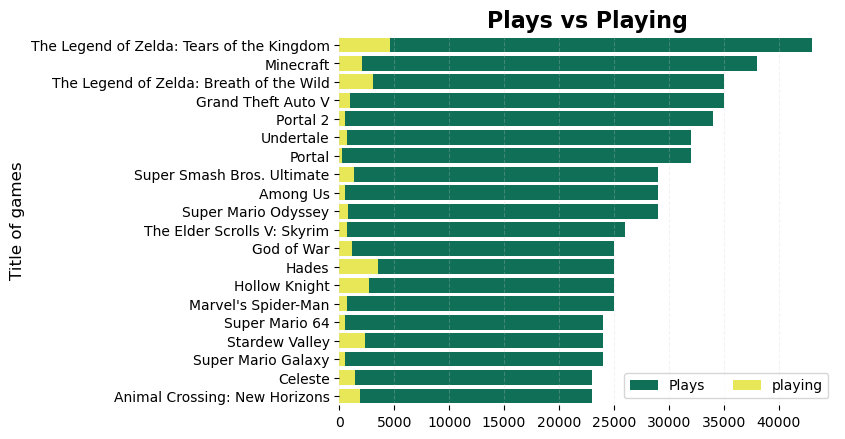

In [114]:
x_ticks=np.arange(0,45000, step=5000)
Rating_df=reviews_df.sort_values(by="Plays", ascending=False).reset_index(drop=True).head(20)
sns.barplot(y="Title", x="Plays", data=Rating_df, label= "Plays", color="#007F5F")

sns.barplot(y="Title", x="Playing", data=Rating_df, label="playing", color="#FFFF3F")         
plt.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)
plt.grid(color="lightgrey", axis="x", linestyle="--", alpha=0.25)
plt.xlabel("", fontstyle="italic", fontsize=12)
plt.xticks(x_ticks)
plt.ylabel("Title of games", fontsize=12)
plt.title("Plays vs Playing", fontsize=16, fontweight="bold")

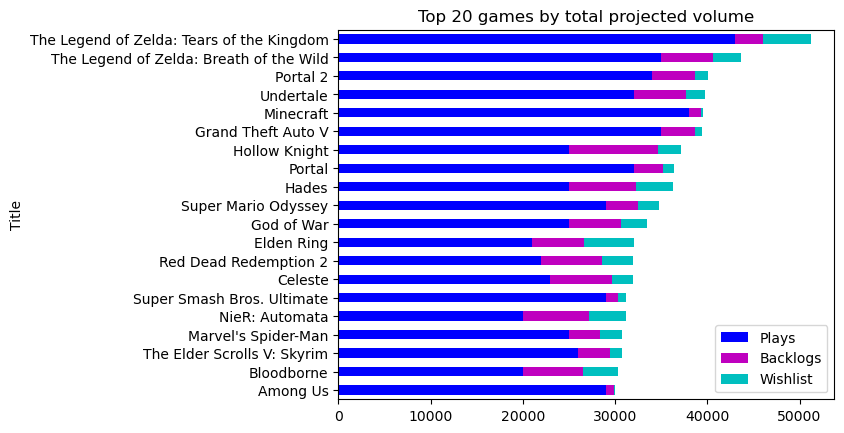

In [352]:

# list of columns to be considered 
columns = ['Plays', 'Backlogs', 'Wishlist'] 
  
# filtering rows on basis of certain columns 
reviews_df['projected_sum'] = reviews_df[columns].sum(axis=1)
reviews_projected_sum= reviews_df.nlargest(20, 'projected_sum')
         
#print("\nDataframe after filtering\n") 
#print(reviews_projected_sum) 

columns_for_chart = ["Title", 'Plays', 'Backlogs', 'Wishlist'] 

stacked_bar_projected = reviews_projected_sum[columns_for_chart]
#stacked_bar_projected.head()
#print(stacked_bar_projected)
stacked_bar_projected.plot(x='Title',kind="barh", stacked=True, color=["b","m","c"])
plt.title("Top 20 games by total projected volume")
plt.gca().invert_yaxis()

Text(0.5, 1.0, 'Top 20 games and number of platforms')

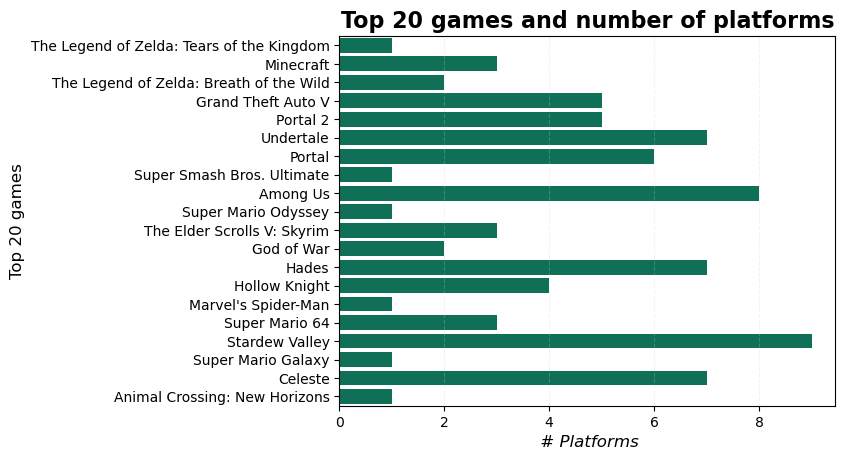

In [174]:

Rating_df=reviews_df.sort_values(by="Plays", ascending=False).reset_index(drop=True).head(20)
sns.barplot(y="Title", x="Platform_Count", data=Rating_df, label= "Plays", color="#007F5F")
plt.grid(color="lightgrey", axis="x", linestyle="--", alpha=0.25)
plt.xlabel(" # Platforms", fontstyle="italic", fontsize=12)

plt.ylabel("Top 20 games", fontsize=12)
plt.title("Top 20 games a number of platforms", fontsize=16, fontweight="bold")

In [160]:
(reviews_df.nlargest(20, "Plays")["Plays"].sum())/(reviews_df["Plays"].sum()-reviews_df.nlargest(20, "Plays")["Plays"].sum())


9.730449764875425

In [173]:
reviews_df["Plays"].sum()-reviews_df.nlargest(20, "Plays")["Plays"].sum()

5960670.0

In [170]:
reviews_pie=reviews_df.sort_values(by="Plays", ascending=False).reset_index(drop=True).head(20)
Total_sum=reviews_df["Plays"].sum()
new_row={'Title':'Total', 'Plays':Total_sum}
reviews_pie.loc[len(reviews_pie)]=new_row
reviews_pie.head(21)

C:\Users\mrunm\AppData\Local\Temp\ipykernel_24392\1372779386.py:4: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  reviews_pie.loc[len(reviews_pie)]=new_row


,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count,Release_Year,Release_Month
0,The Legend of Zelda: Tears of the Kingdom,2023-05-12,Nintendo,The Legend of Zelda: Tears of the Kingdom is t...,Nintendo Switch,Adventure,4.6,43000.0,4600.0,3000.0,5200.0,1900.0,1100.0,1.0,1.0,2023.0,5.0
1,Minecraft,2011-11-18,Mojang Studios,Minecraft focuses on allowing the player to ex...,"Windows PC, Mac, Linux","Adventure, Simulator",4.3,38000.0,2100.0,1300.0,265.0,2600.0,2700.0,3.0,2.0,2011.0,11.0
2,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,The Legend of Zelda: Breath of the Wild is the...,"Wii U, Nintendo Switch","Adventure, Puzzle",4.4,35000.0,3100.0,5600.0,3000.0,5100.0,3000.0,2.0,2.0,2017.0,3.0
3,Grand Theft Auto V,2013-09-17,Rockstar North,Grand Theft Auto V is a vast open world game s...,"Windows PC, Xbox 360, PlayStation 4, PlaySt...","Adventure, Shooter",3.8,35000.0,958.0,3700.0,757.0,2400.0,1700.0,5.0,2.0,2013.0,9.0
4,Portal 2,2011-04-18,Electronic Arts,"Sequel to the acclaimed Portal (2007), Portal ...","Windows PC, Mac, Xbox 360, Linux, PlayStat...","Adventure, Platform, Puzzle, Shooter",4.4,34000.0,556.0,4700.0,1400.0,3300.0,1900.0,5.0,4.0,2011.0,4.0
5,Undertale,2015-09-15,tobyfox,"A small child falls into the Underground, wher...","Windows PC, Mac, Linux, PlayStation 4, Xbo...","Adventure, Indie, RPG, Turn Based Strategy",4.2,32000.0,728.0,5700.0,2100.0,3900.0,2500.0,7.0,4.0,2015.0,9.0
6,Portal,2007-10-10,Electronic Arts,"Waking up in a seemingly empty laboratory, the...","Windows PC, Android, Mac, Xbox 360, Linux,...","Platform, Puzzle, Shooter",4.1,32000.0,281.0,3200.0,1200.0,2300.0,1600.0,6.0,3.0,2007.0,10.0
7,Super Smash Bros. Ultimate,2018-12-07,Bandai Namco Studios,Legendary game worlds and fighters collide in ...,Nintendo Switch,"Fighting, Platform",4.1,29000.0,1300.0,1300.0,907.0,2800.0,1800.0,1.0,2.0,2018.0,12.0
8,Among Us,2018-06-15,Innersloth,Play with 4-15 player online or via local WiFi...,"Windows PC, Android, PlayStation 4, iOS, X...","Indie, Strategy",3.0,29000.0,480.0,877.0,138.0,975.0,2600.0,8.0,2.0,2018.0,6.0
9,Super Mario Odyssey,2017-10-27,Nintendo,Explore incredible places far from the Mushroo...,Nintendo Switch,"Adventure, Platform",4.2,29000.0,824.0,3500.0,2300.0,3400.0,2000.0,1.0,2.0,2017.0,10.0


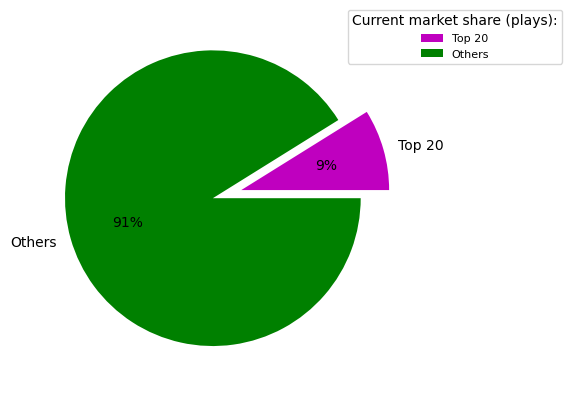

In [250]:

top_20_sum=reviews_df.nlargest(20, "Plays")["Plays"].sum()
Total_sum=reviews_df["Plays"].sum()

y = np.array([top_20_sum, Total_sum - top_20_sum])
mylabels = ["Top 20", "Others"]
myexplode = [0.2, 0]
mycolors = ["m", "g"]

plt.pie(y, labels = mylabels, explode = myexplode, colors = mycolors, shadow = False, autopct="%1.f%%")

plt.legend( title = "Current market share (plays):",  bbox_to_anchor=(0.85,1.025),
           fontsize=8)
plt.show() 


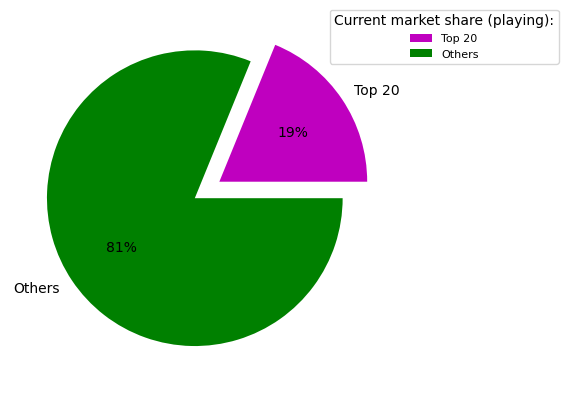

In [249]:

top_20_sum=reviews_df.nlargest(20, "Playing")["Playing"].sum()
Total_sum=reviews_df["Playing"].sum()

y = np.array([top_20_sum, Total_sum - top_20_sum])
mylabels = ["Top 20", "Others"]
myexplode = [0.2, 0]
mycolors = ["m", "g"]

plt.pie(y, labels = mylabels, explode = myexplode, colors = mycolors, shadow = False, autopct="%1.f%%")

plt.legend( title = "Current market share (playing):",  bbox_to_anchor=(0.85,1.025),
           fontsize=8)
plt.show() 


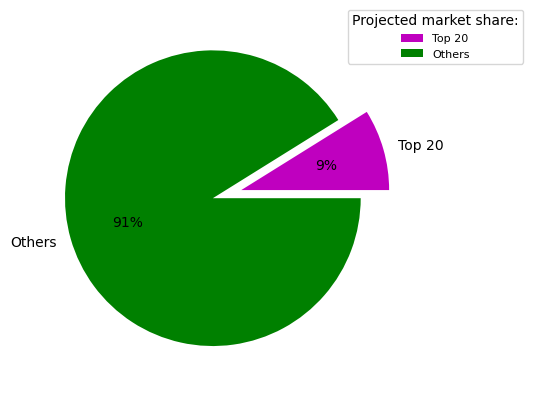

In [348]:
# list of columns to be considered 
columns = ['Plays', 'Backlogs', 'Wishlist'] 
  
# filtering rows on basis of certain columns 
reviews_df['projected_sum'] = reviews_df[columns].sum(axis=1)
df= reviews_df.nlargest(20, 'projected_sum')
         
#print("\nDataframe after filtering\n") 
#print(df) 

top_20_projected_sum=reviews_df.nlargest(20, 'projected_sum')['projected_sum'].sum()
Total_projected_sum=reviews_df["projected_sum"].sum()

y = np.array([top_20_sum, Total_sum - top_20_sum])
mylabels = ["Top 20", "Others"]
myexplode = [0.2, 0]
mycolors = ["m", "g"]

plt.pie(y, labels = mylabels, explode = myexplode, colors = mycolors, shadow = False, autopct="%1.f%%")

plt.legend( title = "Projected market share:",  bbox_to_anchor=(0.85,1.025),
           fontsize=8)
plt.show() 


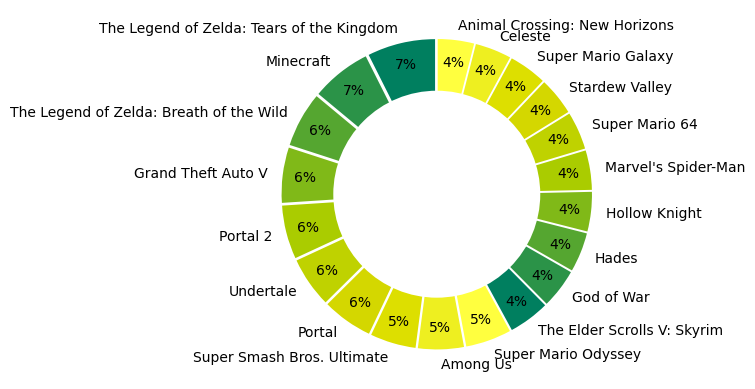

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count,Release_Year,Release_Month
0,The Legend of Zelda: Tears of the Kingdom,2023-05-12,Nintendo,The Legend of Zelda: Tears of the Kingdom is t...,Nintendo Switch,Adventure,4.6,43000.0,4600.0,3000.0,5200.0,1900.0,1100.0,1,1,2023,5
1,Minecraft,2011-11-18,Mojang Studios,Minecraft focuses on allowing the player to ex...,"Windows PC, Mac, Linux","Adventure, Simulator",4.3,38000.0,2100.0,1300.0,265.0,2600.0,2700.0,3,2,2011,11
2,The Legend of Zelda: Breath of the Wild,2017-03-03,Nintendo,The Legend of Zelda: Breath of the Wild is the...,"Wii U, Nintendo Switch","Adventure, Puzzle",4.4,35000.0,3100.0,5600.0,3000.0,5100.0,3000.0,2,2,2017,3
3,Grand Theft Auto V,2013-09-17,Rockstar North,Grand Theft Auto V is a vast open world game s...,"Windows PC, Xbox 360, PlayStation 4, PlaySt...","Adventure, Shooter",3.8,35000.0,958.0,3700.0,757.0,2400.0,1700.0,5,2,2013,9
4,Portal 2,2011-04-18,Electronic Arts,"Sequel to the acclaimed Portal (2007), Portal ...","Windows PC, Mac, Xbox 360, Linux, PlayStat...","Adventure, Platform, Puzzle, Shooter",4.4,34000.0,556.0,4700.0,1400.0,3300.0,1900.0,5,4,2011,4


In [197]:
reviews_pie=reviews_df.sort_values(by="Plays", ascending=False).reset_index(drop=True).head(20)

explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
plt.pie(reviews_pie["Plays"], labels=reviews_pie.Title, shadow=False, 
        startangle=90, pctdistance=0.85, explode=explode,  autopct="%1.f%%")
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.show()
reviews_pie

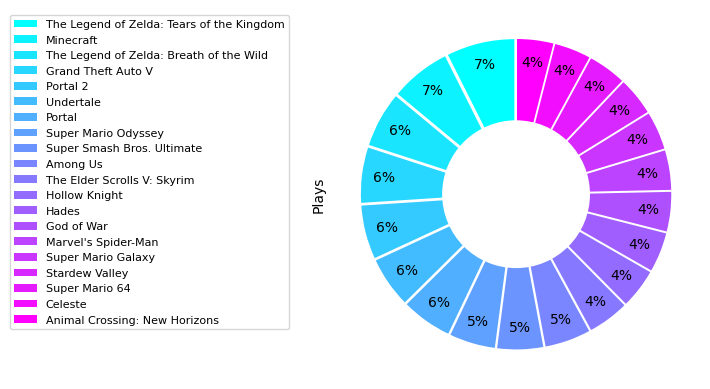

In [262]:

reviews_pie=reviews_df.nlargest(20, "Plays").reset_index(drop=True)
reviews_pie.head()
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
#explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
#reviews_pie["Plays"].plot.pie(labels=reviews_pie.Title, autopct="%1.f%%", shadow=False, 
        #startangle=90, pctdistance=0.85, explode=explode, cmap="cool")
reviews_pie["Plays"].plot.pie(labels=None, autopct="%1.f%%", shadow=False,
        startangle=90, pctdistance=0.85, explode=explode, cmap="cool")

#center_circle = plt.Circle((0, 0), 0.70, fc='white')
center_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
#plt.show()


plt.legend(  reviews_pie.Title, bbox_to_anchor=(-0.1, 1.),
          fontsize=8)
plt.show()

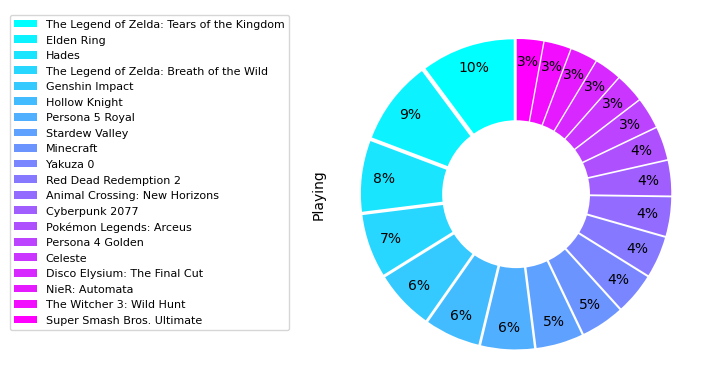

In [263]:

reviews_pie=reviews_df.nlargest(20, "Playing").reset_index(drop=True)
reviews_pie.head()
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
#explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
#reviews_pie["Plays"].plot.pie(labels=reviews_pie.Title, autopct="%1.f%%", shadow=False, 
        #startangle=90, pctdistance=0.85, explode=explode, cmap="cool")
reviews_pie["Playing"].plot.pie(labels=None, autopct="%1.f%%", shadow=False,
        startangle=90, pctdistance=0.85, explode=explode, cmap="cool")

#center_circle = plt.Circle((0, 0), 0.70, fc='white')
center_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
#plt.show()


plt.legend(  reviews_pie.Title, bbox_to_anchor=(-0.1, 1.),
          fontsize=8)
plt.show()

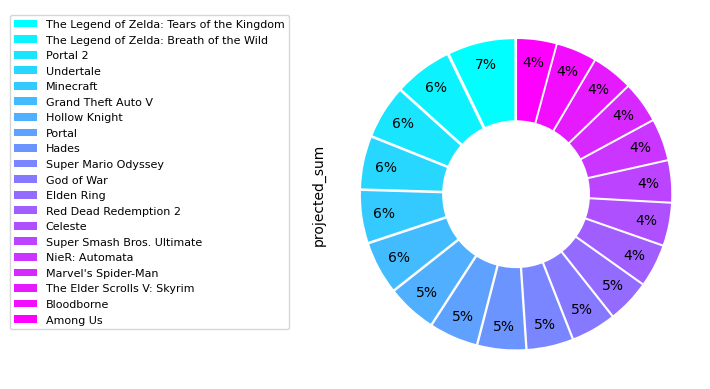

In [350]:
# list of columns to be considered 
columns = ['Plays', 'Backlogs', 'Wishlist'] 
  
# filtering rows on basis of certain columns 
reviews_df['projected_sum'] = reviews_df[columns].sum(axis=1)
df= reviews_df.nlargest(20, 'projected_sum')
         
#print("\nDataframe after filtering\n") 
#print(df) 

reviews_pie=reviews_df.nlargest(20, "projected_sum").reset_index(drop=True)
reviews_pie.head()
explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05,0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
#explode = [0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05]
#reviews_pie["Plays"].plot.pie(labels=reviews_pie.Title, autopct="%1.f%%", shadow=False, 
        #startangle=90, pctdistance=0.85, explode=explode, cmap="cool")
reviews_pie["projected_sum"].plot.pie(labels=None, autopct="%1.f%%", shadow=False,
        startangle=90, pctdistance=0.85, explode=explode, cmap="cool")

#center_circle = plt.Circle((0, 0), 0.70, fc='white')
center_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
#plt.show()


plt.legend(  reviews_pie.Title, bbox_to_anchor=(-0.1, 1.),
          fontsize=8)
plt.show()

In [35]:
reviews_df.nlargest(20, "Playing").sort_values(by="Release_Date", ascending=False).reset_index(drop=True).head


,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count,Release_Year,Release_Month
0,The Legend of Zelda: Tears of the Kingdom,2023-05-12,Nintendo,The Legend of Zelda: Tears of the Kingdom is t...,Nintendo Switch,Adventure,4.6,43000.0,4600.0,3000.0,5200.0,1900.0,1100.0,1,1,2023.0,5.0
1,Elden Ring,2022-02-25,FromSoftware,"Elden Ring is a fantasy, action and open world...","Windows PC, PlayStation 4, Xbox One, PlaySt...","Adventure, RPG",4.5,21000.0,4100.0,5600.0,5500.0,4600.0,3000.0,5,2,2022.0,2.0
2,Pokémon Legends: Arceus,2022-01-28,Nintendo,The Pokémon Legends: Arceus game honors past P...,Nintendo Switch,"Adventure, RPG, Turn Based Strategy",3.7,11000.0,1600.0,3000.0,2300.0,1800.0,1200.0,1,3,2022.0,1.0
3,Disco Elysium: The Final Cut,2021-03-30,ZA/UM,Disco Elysium: The Final Cut is a groundbreaki...,"Windows PC, Mac, PlayStation 4, Xbox One, ...","Adventure, Indie, RPG",4.6,7300.0,1300.0,6000.0,3100.0,1300.0,874.0,8,3,2021.0,3.0
4,Cyberpunk 2077,2020-12-09,CD Projekt RED,"Cyberpunk 2077 is an open-world, action-advent...","Windows PC, PlayStation 4, Xbox One, PlaySt...","Adventure, RPG, Shooter",3.4,16000.0,1700.0,5700.0,3300.0,1700.0,1600.0,6,3,2020.0,12.0


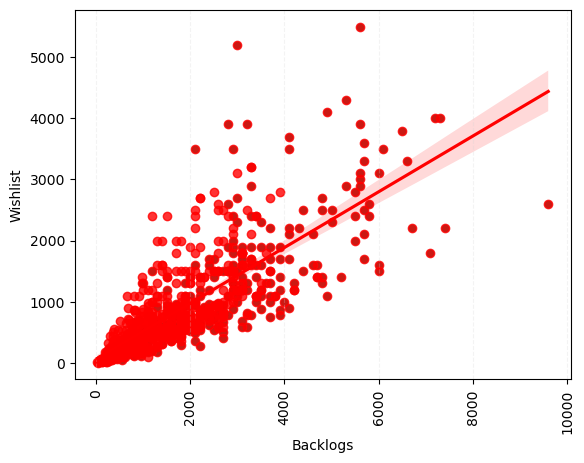

In [175]:
sns.scatterplot(x="Backlogs", y="Wishlist", data=reviews_df.nlargest(500,"Plays"))
# customizations
#plt.xlabel("Developers", fontstyle="italic", fontsize=12)
#plt.ylabel("Total Plays by Dev", fontstyle="italic", fontsize=12)
#plt.title("Double Bar", fontsize=16, fontweight="bold")
#plt.ylim(0, 900000)
plt.xticks(rotation=90)
plt.grid(color="lightgrey", axis="x", linestyle="--", alpha=0.25)
#sns.despine(left=True, bottom=True)
# show
sns.regplot(data=reviews_df, x='Backlogs', y='Wishlist', color="red")
plt.show()

In [38]:
reviews_df["Release_Year"]=reviews_df["Release_Date"].dt.year
reviews_df["Release_Month"]=reviews_df["Release_Date"].dt.month
reviews_df.head(20)

,Title,Release_Date,Developers,Summary,Platforms,Genres,Rating,Plays,Playing,Backlogs,Wishlist,Lists,Reviews,Platform_Count,Genre_Count,Release_Year,Release_Month
0,Resident Evil 4,2023-03-24,Capcom,Resident Evil 4 is a remake of the 2005 origin...,"Windows PC, PlayStation 4, PlayStation 5, X...","Adventure, Puzzle, Shooter",4.6,6100.0,908.0,2100.0,3500.0,1900.0,1400.0,4,3,2023,3
1,Bloodborne: The Old Hunters,2015-11-24,FromSoftware,The Old Hunters is the first Expansion for Blo...,PlayStation 4,"Adventure, RPG",4.6,5100.0,80.0,1100.0,721.0,310.0,252.0,1,2,2015,11
2,Final Fantasy XIV: Endwalker,2021-12-07,Square Enix,Final Fantasy XIV: Endwalker is the fourth exp...,"Windows PC, Mac, PlayStation 4, PlayStation 5","Adventure, RPG",4.6,2900.0,503.0,789.0,437.0,472.0,370.0,4,2,2021,12
3,Disco Elysium: The Final Cut,2021-03-30,ZA/UM,Disco Elysium: The Final Cut is a groundbreaki...,"Windows PC, Mac, PlayStation 4, Xbox One, ...","Adventure, Indie, RPG",4.6,7300.0,1300.0,6000.0,3100.0,1300.0,874.0,8,3,2021,3
4,Final Fantasy XIV: Shadowbringers,2019-07-02,Square Enix,SHADOWBRINGERS is the third expansion for FFXI...,"Windows PC, Mac, PlayStation 4, PlayStation 5",RPG,4.6,3400.0,198.0,570.0,300.0,446.0,302.0,4,1,2019,7
5,The Legend of Zelda: Tears of the Kingdom,2023-05-12,Nintendo,The Legend of Zelda: Tears of the Kingdom is t...,Nintendo Switch,Adventure,4.6,43000.0,4600.0,3000.0,5200.0,1900.0,1100.0,1,1,2023,5
6,Outer Wilds,2019-05-28,Mobius Digital,Outer Wilds is a critically-acclaimed and awar...,"Windows PC, PlayStation 4, Xbox One, PlaySt...","Adventure, Indie, Puzzle, Simulator",4.6,9100.0,736.0,5700.0,3600.0,2000.0,1100.0,6,4,2019,5
7,Metal Gear Solid 3: Subsistence,2005-12-22,Konami Computer Entertainment Japan,Metal Gear Solid 3: Subsistence continues the ...,PlayStation 2,"Adventure, Shooter, Tactical",4.6,4200.0,60.0,1200.0,749.0,754.0,206.0,1,3,2005,12
8,Disco Elysium,2019-10-15,ZA/UM,"A CRPG in which, waking up in a hotel room a t...","Windows PC, Mac","Adventure, RPG, Turn Based Strategy",4.6,4800.0,561.0,3300.0,2100.0,1300.0,364.0,2,3,2019,10
9,Mass Effect Legendary Edition,2021-05-14,BioWare,One person is all that stands between humanity...,"Windows PC, PlayStation 4, Xbox One","Adventure, RPG, Shooter, Strategy",4.5,3400.0,649.0,2900.0,1000.0,679.0,295.0,3,4,2021,5


C:\Users\mrunm\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrunm\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


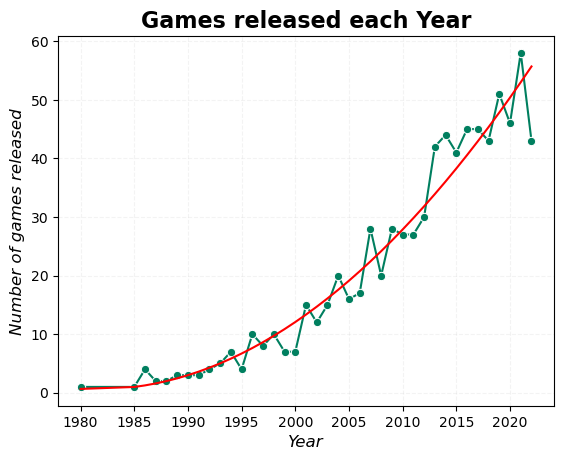

In [179]:
title_counts_y = reviews_df.groupby('Release_Year').size().reset_index(name='title_counts_y')
title_counts_y = title_counts_y[title_counts_y['Release_Year'] != title_counts_y['Release_Year'].max()]
plt.grid(color="lightgrey", linestyle="--", alpha=0.25)
sns.lineplot(data=title_counts_y, x='Release_Year', y='title_counts_y', marker='o')
#print(title_counts_y)
x=reviews_df['Release_Year']
#x= list(set(reviews_df.groupby('Release_Year')))
#x= list(reviews_df.groupby('Release_Year'))
y=title_counts_y

 #list_set = set(list1)
    # convert the set to the list
    #unique_list = (list(list_set))

#print(y)
xx=y['Release_Year']
yy=y['title_counts_y']

#print(xx)
#print(yy)
z=np.polyfit(xx,yy,2)
p=np.poly1d(z)
plt.plot(xx, p(xx),color="red")
plt.ylabel("Number of games released", fontstyle="italic", fontsize=12)
plt.title("Games released each Year", fontsize=16, fontweight="bold")
plt.xlabel("Year", fontstyle="italic", fontsize=12)
x_ticks=np.arange(1980,2025, step=5)
plt.xticks(x_ticks)
#sns.regplot(data=title_counts_y, x='Release_Year', y='title_counts_y', color="red")

plt.show()

C:\Users\mrunm\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrunm\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Games released each month'}, xlabel='Month', ylabel='Number of games released'>

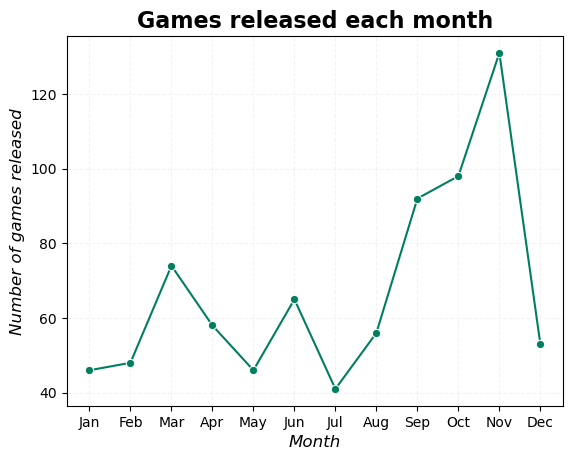

In [106]:
title_counts_m = reviews_df.groupby('Release_Month').size().reset_index(name='title_count_m')
plt.ylabel("Number of games released", fontstyle="italic", fontsize=12)
plt.title("Games released each month", fontsize=16, fontweight="bold")
plt.xlabel("Month", fontstyle="italic", fontsize=12)
plt.grid(color="lightgrey", linestyle="--", alpha=0.25)


plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12],["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
sns.lineplot(data=title_counts_m, x='Release_Month', y='title_count_m', marker='o')

C:\Users\mrunm\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\mrunm\anaconda3\envs\dev\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 0, 'Rating')

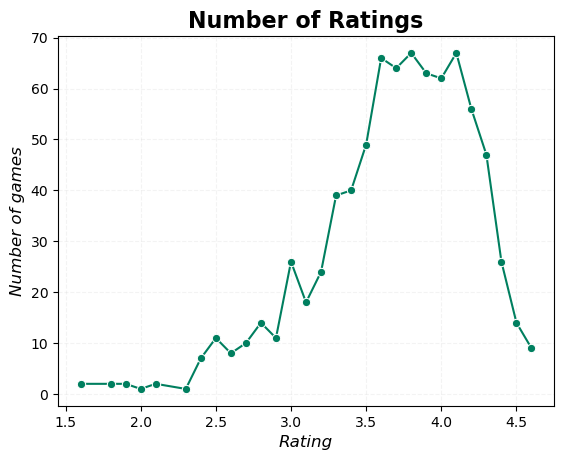

In [107]:
rating_counts = reviews_df.groupby('Rating').size().reset_index(name='rating_counts')
sns.lineplot(data=rating_counts, x='Rating', y='rating_counts', marker='o')
plt.grid(color="lightgrey", linestyle="--", alpha=0.25)
plt.ylabel("Number of games", fontstyle="italic", fontsize=12)
plt.title("Number of Ratings", fontsize=16, fontweight="bold")
plt.xlabel("Rating", fontstyle="italic", fontsize=12)